## CA 3 - Machine Learning
## Using Linear Regressor & Nerual Network Regressor

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt

In [2]:
source_df=pd.read_excel("Updated_PowerConsumption_India.xls",parse_dates=['Date'])

report = source_df
# report.info()
# report

In [3]:
# assigned_states_df=pd.DataFrame(report, columns = ['Date','Year','month','Day','Meghalaya','Tripura'])
# assigned_states_df=pd.DataFrame(report, columns = ['Date','Meghalaya','Tripura'])
# assigned_states_df=pd.DataFrame(report, columns = ['Date','Meghalaya'])
df2 = my_state = pd.DataFrame(report, columns = ['Date','Meghalaya'])

## To export the dataframe to csv with Total Consumption column comment the lines with/without index values
# assigned_states_df.to_csv('~/Downloads/Updated_PowerConsumption_India.csv', sep=',',index=False,header=True)


### Q1. The file contains state-wise power consumption in Indian during 2019 and 2020. Create a separate data-frame containing data on power consumption for the state allotted to you according to your roll number

In [4]:
# df = pd.read_csv('~/Downloads/Updated_PowerConsumption_India.csv',parse_dates=['Date'])
df = pd.DataFrame(report, columns = ['Date','Meghalaya'])
df

,Date,Meghalaya
0,2019-01-02,6.1
1,2019-01-03,6.5
2,2019-01-04,6.3
3,2019-01-05,5.7
4,2019-01-06,6.2
...,...,...
498,2020-12-01,5.4
499,2020-12-02,5.4
500,2020-12-03,5.4
501,2020-12-04,5.7


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

### SciKit LEARN
#### Data Standardization through Preprosessing & cleanup

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
forecast_col = 'Meghalaya'

forecast_out = int(math.ceil(0.01 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], axis=1))
X = np.array(df.drop(columns='label'))
X = preprocessing.scale(X)
X_lately = X[:-forecast_out:]

X = X[:-forecast_out]

df.dropna(inplace=True)

Y = np.array(df['label'])

### Q2. Split the data into 80% training and 20% testing the models

In [8]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state=123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(397, 2) (100, 2) (397,) (100,)


### Q3. Get the regression accuracy for the test datasets using linear regressor. Predict the power consumption on 1st March, 2021 and 1st March, 2022

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model_LR = LinearRegression()

In [11]:
model_LR = LinearRegression()

model_LR.fit(x_train, y_train)
model_LR.score(x_test, y_test)

# model_LR.predict(x_test)
y_pred = model_LR.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

LinearRegression()

-0.009744990515138108

    Actual  Predicted
0      5.9   5.586045
1      6.2   5.779821
2      5.5   5.606816
3      5.7   5.634252
4      5.9   5.603205
..     ...        ...
95     6.4   5.569447
96     4.7   5.701468
97     6.6   5.623464
98     6.2   5.737849
99     5.9   5.673687

[100 rows x 2 columns]


In [12]:
df3 = pd.DataFrame()
df4 = pd.DataFrame()

In [13]:
forecast_set_1 = model_LR.predict(X_lately)
df3['Forecast_LR'] = np.nan

df1=df.iloc[:, 0].astype(int).map(dt.datetime.fromordinal)

last_date = df1.iloc[-1]

last_unix = last_date.timestamp()

one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set_1:
    next_date = dt.datetime.fromtimestamp(next_unix)

    next_unix += 86400
    df3.loc[next_date] = [np.nan for _ in range(len(df3.columns)-1)]+[i]
    if (next_date.strftime("%Y-%m-%d") == "2021-03-01"):
        next_date_1=next_date.strftime("%Y-%m-%d")
        print(f"Power Consumption on {next_date_1} is {i}.")
    if (next_date.strftime("%Y-%m-%d") == "2022-03-01"):
        next_date_1=next_date.strftime("%Y-%m-%d")
        print(f"Power Consumption on {next_date_1} is {i}.")
    

Power Consumption on 2021-03-01 is 5.631242268437675.
Power Consumption on 2022-03-01 is 5.738800539662405.


### Q4. Get the regression accuracy for the test datasets using neural network as a regressor. Predict the power consumption on 1st March, 2021 and 1st March, 2022


## Artificial Neural Network

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [15]:
model_NN = MLPRegressor(max_iter=1000)

model_NN.fit(x_train, y_train)
model_NN.score(x_train, y_train)

# model_NN.predict(x_test)
y_pred = model_NN.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

MLPRegressor(max_iter=1000)

0.03154392271193451

    Actual  Predicted
0      5.9   5.658365
1      6.2   5.952234
2      5.5   5.666478
3      5.7   5.708606
4      5.9   5.584012
..     ...        ...
95     6.4   5.403074
96     4.7   5.903234
97     6.6   5.640911
98     6.2   6.052213
99     5.9   5.802116

[100 rows x 2 columns]


In [16]:
forecast_set_2 = model_NN.predict(X_lately)

df4['Forecast_NN'] = np.nan ## Neural Network

last_date = df1.iloc[-1]
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set_2:
    next_date = dt.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df4.loc[next_date] = [np.nan for _ in range(len(df4.columns)-1)]+[i]
    if (next_date.strftime("%Y-%m-%d") == "2021-03-01"):
        next_date_1=next_date.strftime("%Y-%m-%d")
        print(f"Power Consumption on {next_date_1} is {i}.")
    if (next_date.strftime("%Y-%m-%d") == "2022-03-01"):
        next_date_1=next_date.strftime("%Y-%m-%d")
        print(f"Power Consumption on {next_date_1} is {i}.")

Power Consumption on 2021-03-01 is 5.666026941498961.
Power Consumption on 2022-03-01 is 5.838818138610312.


### Q5.  Compare and comment on the outcomes through both the regressors.

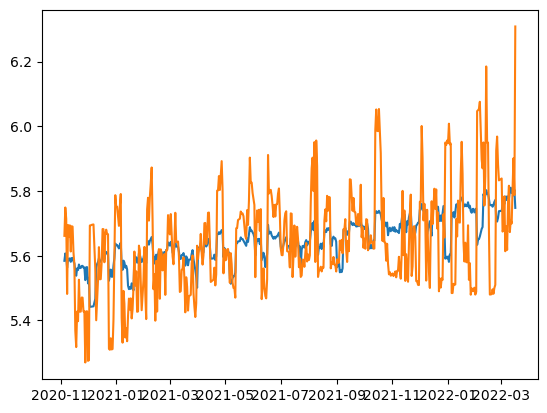

In [17]:
# df3
# df4
x = df['Date']
y = df['Meghalaya']
x1 = df3.index
y1 = df3['Forecast_LR']
plt.plot(x1,y1)
x2 = df4.index
y2 = df4['Forecast_NN']
plt.plot(x2,y2)

<AxesSubplot:>

<AxesSubplot:>

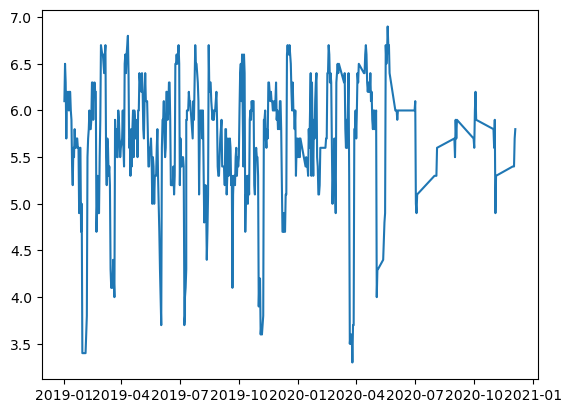

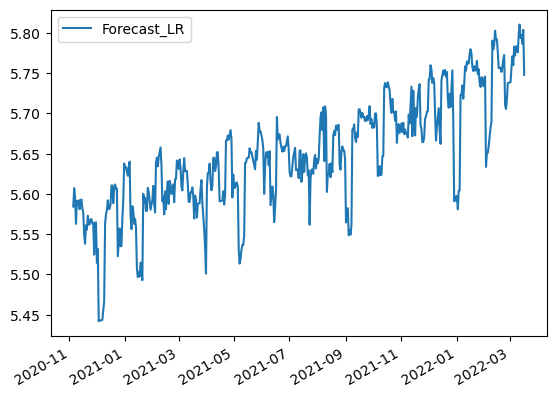

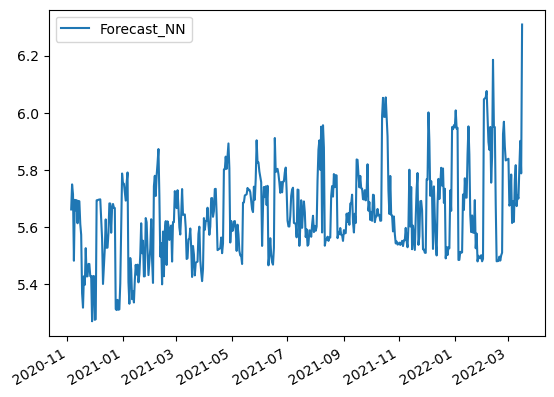

In [18]:
plt.plot(df2['Date'],df2['Meghalaya'])
df3.plot()
df4.plot()
plt.show()

## Summary

As we can see in the graphs plotted using both Linear Regressor and Neural Network Regressor shows us that the predicted values as follows,

1.In Linear Regressor - We observe the predicted value grow very linearly over predicted period of time from December 2020 until March 2022.


2.In Neural Network Regressor - The predicted values regularly spread out and looks more like the actual values so we can prefer the data from NN Regressor over Linear Regressor for Time Series analysis of predictions.

Thank you!